# Optimization in Python

This notebook will illustrate numerical optimization in Python.

The general problem:

$$\min_{x} f(x) \ \ s.t. g(x) \geq 0 \ \ and \ \ h(x) = 0 $$

Let's focus on the problem of minimizing average cost:

$$ AC(x) = \frac{a}{x} + b + cx $$

subject to:

$x \geq 0$

In [13]:
def ac (x, *params):
    '''
    This is the average cost function:
    AC(x) = a/x + b + cx
    
    args:
        x (scalar): the amount of output
        params (tuple): (a,b,c)
        
    Return:
        avg_cost (scalar): the avg cost at x
    '''
    a, b, c = params
#    if x  > 0:
    avg_cost = a / x + b + c * x
#    else:
#        avg_cost = 1e9
    
    return avg_cost

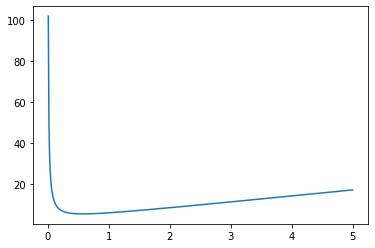

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# set a, b, c
a, b, c = 1, 2, 3

#put in tuple
params = (a, b, c)

#define a range of x values
x = np.linspace(0.01, 5, 500)

#get average cost
avg_cost = ac(x, params)

#plot average cost
plt.plot(x,avg_cost)
plt.show()

In [6]:
#Solve analytically

min_x = (a / c) ** (1 / 2)
min_x

0.5773502691896257

## Numerical optimization with SciPy

Use SciPy's optimization libraries for numerical optimization

In [10]:
import scipy
import scipy.optimize as opt

In [25]:
#Use scipy and golden ratio search to find the min
result = opt.minimize_scalar(ac, bracket = (0.2, 1.0), args = params, method = 'golden',
                             tol = 1e-15, options = {'maxiter': 5000})
print('The analytical solution is x = ', min_x)
print('The numerical solution is x = ', result['x'])

The analytical solution is x =  0.5773502691896257
The numerical solution is x =  0.5773502671176581


In [26]:
#Use scipy and Brent's method to find the min
result = opt.minimize_scalar(ac, bracket = (0.2, 1.0), args = params, method = 'Brent',
                             tol = 1e-15, options = {'maxiter': 5000})
print('The analytical solution is x = ', min_x)
print('The numerical solution is x = ', result['x'])

The analytical solution is x =  0.5773502691896257
The numerical solution is x =  0.5773502679565535


## Multi-dimensional optimization

Use  scipy.optimize.minimize

In [35]:
#minimize with Nelder-Mead:

result = opt.minimize(ac, 1.2, args = params, method = 'Nelder-Mead',
                             tol = 1e-15, options = {'maxiter': 5000})
print('The analytical solution is x = ', min_x)
print('The numerical solution is x = ', result['x'])

The analytical solution is x =  0.5773502691896257
The numerical solution is x =  [0.57735027]


In [36]:
#minimize with BFGS:
result = opt.minimize(ac, 1.2, args = params, method = 'BFGS',
                             tol = 1e-15, options = {'maxiter': 5000})
print('The analytical solution is x = ', min_x)
print('The numerical solution is x = ', result['x'])

The analytical solution is x =  0.5773502691896257
The numerical solution is x =  [0.57735026]


In [33]:
#Define Jacobian and Hessian functions
def jac_ac(x, *params):
    '''
    Compute the Jacobian of the AC function
    '''
    a, b, c = params 
    jac = -1 * a * x ** -2 + c
    return jac


def hess_ac(x, *params):
    '''
    Compute the Hessian of the AC function
    '''
    a, b, c = params 
    hess = 2 * a * x ** -3
    return hess

In [37]:
#minimize with Newton's Conjugate Gradient Method:
result = opt.minimize(ac, 1.2, args = params, method = 'Newton-CG', jac = jac_ac, hess = hess_ac,
                             tol = 1e-15, options = {'maxiter': 5000})
print('The analytical solution is x = ', min_x)
print('The numerical solution is x = ', result['x'])

The analytical solution is x =  0.5773502691896257
The numerical solution is x =  [-2.17897972e+105]


/Users/Aditya/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:1614: RuntimeWarning: overflow encountered in true_divide
  xsupi = dri0 / (-curv) * b
/Users/Aditya/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:274: RuntimeWarning: invalid value encountered in multiply
  return f(xk + alpha * pk, *args)


## Compare speed

We saw above that the gradient based method was less robust. Let's check speed...

In [39]:
#import the time package
import time

N = 5000

start_time = time.time()
for i in range(N):
    result = opt.minimize(ac, 0.6, args = params, method = 'Newton-CG', jac = jac_ac, hess = hess_ac,
                             tol = 1e-15, options = {'maxiter': 5000})
end_time = time.time()
print('Newtons CG method time = ', end_time - start_time)

start_time = time.time()
for i in range(N):
    result = opt.minimize(ac, 0.6, args = params, method = 'Nelder-Mead',
                             tol = 1e-15, options = {'maxiter': 5000})
end_time = time.time()
print('Nelder-Mead method time = ', end_time - start_time)

Newtons CG method time =  2.7561910152435303
Nelder-Mead method time =  14.830888986587524
